In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_profiling as profiling
import seaborn as sns

In [68]:
carsales=pd.read_csv("git_car_sale.txt")
carsales.head(100)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
95,Mercedes-Benz,16500.0,van,223,2.2,Diesel,yes,2009,Vito ????.,rear
96,Volkswagen,17900.0,crossover,145,3.0,Diesel,yes,2007,Touareg,full
97,Volkswagen,0.0,van,165,2.0,Diesel,yes,2013,T5 (Transporter) ????,front
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear


In [69]:
carsales.shape

(9576, 10)

In [70]:
carsales.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [71]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [72]:
profile = profiling.ProfileReport(carsales)
profile.to_file("carsales_before_preprocessing_1.html")

In [73]:
carsales.replace({'engType': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)

In [74]:
carsales.isnull().sum()

car               0
price           267
body              0
mileage         348
engV            434
engType         462
registration      0
year              0
model             0
drive           511
dtype: int64

In [75]:
carsales.drop_duplicates(inplace=True)
carsales.shape

(9463, 10)

In [76]:
profile = profiling.ProfileReport(carsales)
profile.to_file("carsales_before_preprocessing_2.html")

In [77]:
a=carsales.groupby(['car','model']).price.median()
b=a.to_frame()
b

price
car   model              
?UAZ  1301         5950.0
      1302         3500.0
      969 ??????      NaN
      969?         1300.0
Acura MDX         17200.0
...                   ...
ZAZ   Forza        5400.0
      Lanos        5450.0
      Sens         4300.0
      Vida         6900.0
ZX    LandMark     7700.0

[883 rows x 1 columns]

In [78]:
newcarsales=pd.merge(carsales,b,on="model",how='inner')
newcarsales.head(20)

,car,price_x,body,mileage,engV,engType,registration,year,model,drive,price_y
0,Ford,15500.00000,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,18000.0
1,Ford,15500.00000,crossover,68.0,2.5,Diesel,yes,2010,Kuga,front,18000.0
2,Ford,16400.00000,crossover,87.0,2.5,Petrol,yes,2010,Kuga,full,18000.0
3,Ford,14999.00000,crossover,79.0,2.5,Petrol,yes,2013,Kuga,full,18000.0
4,Ford,19800.00000,crossover,113.0,2.0,Diesel,yes,2014,Kuga,full,18000.0
5,Ford,20833.40025,crossover,1.0,2.0,Diesel,yes,2015,Kuga,front,18000.0
6,Ford,14900.00000,crossover,109.0,2.0,Diesel,yes,2010,Kuga,full,18000.0
7,Ford,29900.00000,crossover,68.0,2.0,Diesel,yes,2015,Kuga,full,18000.0
8,Ford,22000.00000,crossover,95.0,1.6,Petrol,yes,2013,Kuga,full,18000.0
9,Ford,26900.00000,crossover,47.0,2.0,Diesel,yes,2015,Kuga,full,18000.0


In [79]:
newcarsales["final_price"]=newcarsales["price_x"].mask(pd.isnull, newcarsales["price_y"])
newcarsales

,car,price_x,body,mileage,engV,engType,registration,year,model,drive,price_y,final_price
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,18000.0,15500.0
1,Ford,15500.0,crossover,68.0,2.5,Diesel,yes,2010,Kuga,front,18000.0,15500.0
2,Ford,16400.0,crossover,87.0,2.5,Petrol,yes,2010,Kuga,full,18000.0,16400.0
3,Ford,14999.0,crossover,79.0,2.5,Petrol,yes,2013,Kuga,full,18000.0,14999.0
4,Ford,19800.0,crossover,113.0,2.0,Diesel,yes,2014,Kuga,full,18000.0,19800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Dodge,13200.0,crossover,145.0,3.7,Petrol,yes,2007,Nitro,full,13200.0,13200.0
10076,Mercedes-Benz,1650.0,sedan,257.0,1.8,Gas,no,1995,CL 180,rear,1650.0,1650.0
10077,Lexus,43000.0,sedan,7.0,2.5,Petrol,yes,2014,GS 250,rear,43000.0,43000.0
10078,Daihatsu,4400.0,van,190.0,1.5,Petrol,yes,1998,Gran Move,front,4400.0,4400.0


In [80]:
newcarsales[newcarsales["final_price"].isnull()]

,car,price_x,body,mileage,engV,engType,registration,year,model,drive,price_y,final_price
9148,Hyundai,NaN,sedan,27.0,5.0,Petrol,yes,2013,Genesis,rear,NaN,NaN
9166,?UAZ,NaN,other,10.0,1.5,Petrol,yes,1991,969 ??????,full,NaN,NaN
9346,GAZ,NaN,other,1.0,NaN,NaN,yes,1958,69,NaN,NaN,NaN
9347,GAZ,NaN,crossover,1.0,NaN,Petrol,yes,1963,69,full,NaN,NaN
9688,GMC,NaN,crossover,130.0,4.3,Petrol,yes,1998,Safari,full,NaN,NaN
9841,VAZ,NaN,hatch,1.0,1.5,Gas,yes,1998,2109 (???????),front,NaN,NaN
9918,Mercedes-Benz,NaN,van,273.0,2.9,Diesel,yes,2001,Sprinter 310 ????.,NaN,NaN,NaN
10018,BMW,NaN,sedan,99.0,4.4,Petrol,yes,2013,Alpina,full,NaN,NaN
10023,Fisker,NaN,other,100.0,NaN,NaN,yes,2001,Karma,NaN,NaN,NaN


In [81]:
newcarsales.describe()

,price_x,mileage,engV,year,price_y,final_price
count,9826.000000,9758.000000,9618.000000,10080.000000,10071.000000,10071.000000
mean,15610.126711,144.890141,2.634897,2006.466468,14225.015912,15983.686701
std,23311.813199,96.632947,5.991688,7.135088,19261.625968,24161.196965
min,259.350000,1.000000,0.100000,1953.000000,375.000000,259.350000
25%,5000.000000,77.000000,1.600000,2004.000000,6200.000000,5100.000000
50%,9200.000000,131.000000,2.000000,2008.000000,9500.000000,9300.000000
75%,16700.000000,199.000000,2.500000,2012.000000,14950.000000,16999.000000
max,547800.000000,999.000000,99.990000,2016.000000,547800.000000,547800.000000


In [82]:
newcarsales["final_price"].fillna("15983",inplace=True)
newcarsales

,car,price_x,body,mileage,engV,engType,registration,year,model,drive,price_y,final_price
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,18000.0,15500
1,Ford,15500.0,crossover,68.0,2.5,Diesel,yes,2010,Kuga,front,18000.0,15500
2,Ford,16400.0,crossover,87.0,2.5,Petrol,yes,2010,Kuga,full,18000.0,16400
3,Ford,14999.0,crossover,79.0,2.5,Petrol,yes,2013,Kuga,full,18000.0,14999
4,Ford,19800.0,crossover,113.0,2.0,Diesel,yes,2014,Kuga,full,18000.0,19800
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Dodge,13200.0,crossover,145.0,3.7,Petrol,yes,2007,Nitro,full,13200.0,13200
10076,Mercedes-Benz,1650.0,sedan,257.0,1.8,Gas,no,1995,CL 180,rear,1650.0,1650
10077,Lexus,43000.0,sedan,7.0,2.5,Petrol,yes,2014,GS 250,rear,43000.0,43000
10078,Daihatsu,4400.0,van,190.0,1.5,Petrol,yes,1998,Gran Move,front,4400.0,4400


In [83]:
newcarsales[newcarsales["final_price"].isnull()]

,car,price_x,body,mileage,engV,engType,registration,year,model,drive,price_y,final_price


In [84]:
newcarsales.drop(columns=['price_x','price_y'],inplace=True)

In [85]:
newcarsales

,car,body,mileage,engV,engType,registration,year,model,drive,final_price
0,Ford,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,15500
1,Ford,crossover,68.0,2.5,Diesel,yes,2010,Kuga,front,15500
2,Ford,crossover,87.0,2.5,Petrol,yes,2010,Kuga,full,16400
3,Ford,crossover,79.0,2.5,Petrol,yes,2013,Kuga,full,14999
4,Ford,crossover,113.0,2.0,Diesel,yes,2014,Kuga,full,19800
...,...,...,...,...,...,...,...,...,...,...
10075,Dodge,crossover,145.0,3.7,Petrol,yes,2007,Nitro,full,13200
10076,Mercedes-Benz,sedan,257.0,1.8,Gas,no,1995,CL 180,rear,1650
10077,Lexus,sedan,7.0,2.5,Petrol,yes,2014,GS 250,rear,43000
10078,Daihatsu,van,190.0,1.5,Petrol,yes,1998,Gran Move,front,4400


In [86]:
newcarsales.isnull().sum()

car               0
body              0
mileage         322
engV            462
engType         484
registration      0
year              0
model             0
drive           542
final_price       0
dtype: int64

In [87]:
profile = profiling.ProfileReport(newcarsales)
profile.to_file("newcarsales_after_postprocessing_price.html")

In [88]:
c=carsales.groupby(['car','model']).engV.median()
d=c.to_frame()
d.rename(columns={"engV":"new_engV"}, inplace=True)
d

new_engV
car   model               
?UAZ  1301             1.7
      1302             1.2
      969 ??????       1.5
      969?             1.2
Acura MDX              3.7
...                    ...
ZAZ   Forza            1.5
      Lanos            1.5
      Sens             1.3
      Vida             1.5
ZX    LandMark         2.4

[883 rows x 1 columns]

In [89]:
newcarsales1=pd.merge(newcarsales,d,on="model",how='inner')
newcarsales1

,car,body,mileage,engV,engType,registration,year,model,drive,final_price,new_engV
0,Ford,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,15500,2.0
1,Ford,crossover,68.0,2.5,Diesel,yes,2010,Kuga,front,15500,2.0
2,Ford,crossover,87.0,2.5,Petrol,yes,2010,Kuga,full,16400,2.0
3,Ford,crossover,79.0,2.5,Petrol,yes,2013,Kuga,full,14999,2.0
4,Ford,crossover,113.0,2.0,Diesel,yes,2014,Kuga,full,19800,2.0
...,...,...,...,...,...,...,...,...,...,...,...
11441,Dodge,crossover,145.0,3.7,Petrol,yes,2007,Nitro,full,13200,3.7
11442,Mercedes-Benz,sedan,257.0,1.8,Gas,no,1995,CL 180,rear,1650,1.8
11443,Lexus,sedan,7.0,2.5,Petrol,yes,2014,GS 250,rear,43000,2.5
11444,Daihatsu,van,190.0,1.5,Petrol,yes,1998,Gran Move,front,4400,1.5


In [90]:
newcarsales1['final_engV'] = np.where(newcarsales1['engV'].isnull(),newcarsales1['new_engV'],newcarsales1['engV'])
newcarsales1

,car,body,mileage,engV,engType,registration,year,model,drive,final_price,new_engV,final_engV
0,Ford,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,15500,2.0,2.5
1,Ford,crossover,68.0,2.5,Diesel,yes,2010,Kuga,front,15500,2.0,2.5
2,Ford,crossover,87.0,2.5,Petrol,yes,2010,Kuga,full,16400,2.0,2.5
3,Ford,crossover,79.0,2.5,Petrol,yes,2013,Kuga,full,14999,2.0,2.5
4,Ford,crossover,113.0,2.0,Diesel,yes,2014,Kuga,full,19800,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11441,Dodge,crossover,145.0,3.7,Petrol,yes,2007,Nitro,full,13200,3.7,3.7
11442,Mercedes-Benz,sedan,257.0,1.8,Gas,no,1995,CL 180,rear,1650,1.8,1.8
11443,Lexus,sedan,7.0,2.5,Petrol,yes,2014,GS 250,rear,43000,2.5,2.5
11444,Daihatsu,van,190.0,1.5,Petrol,yes,1998,Gran Move,front,4400,1.5,1.5


In [91]:
newcarsales1[newcarsales1["final_engV"].isnull()]

,car,body,mileage,engV,engType,registration,year,model,drive,final_price,new_engV,final_engV
8395,Mercedes-Benz,hatch,3.0,NaN,NaN,yes,2016,B-Class Electric Drive,front,42900,NaN,NaN
8396,Mercedes-Benz,hatch,2.0,NaN,NaN,yes,2015,B-Class Electric Drive,NaN,31669,NaN,NaN
8397,Mercedes-Benz,hatch,2.0,NaN,NaN,yes,2015,B-Class Electric Drive,front,39900,NaN,NaN
8398,Mercedes-Benz,hatch,9.0,NaN,NaN,yes,2015,B-Class Electric Drive,front,29999,NaN,NaN
8399,Mercedes-Benz,hatch,8.0,NaN,NaN,yes,2015,B-Class Electric Drive,front,38800,NaN,NaN
9273,Tesla,crossover,NaN,NaN,NaN,yes,2016,Model X,full,178500,NaN,NaN
9274,Tesla,crossover,1.0,NaN,NaN,yes,2016,Model X,full,185000,NaN,NaN
9275,Tesla,crossover,NaN,NaN,NaN,yes,2016,Model X,full,176900,NaN,NaN
10512,Ford,hatch,19.0,NaN,NaN,yes,2013,Focus Electric,front,13266,NaN,NaN
10513,Ford,other,62.0,NaN,NaN,yes,2012,Focus Electric,NaN,11737,NaN,NaN


In [92]:
newcarsales1.describe()

,mileage,engV,year,new_engV,final_engV
count,11098.000000,10928.000000,11446.000000,11409.000000,11413.000000
mean,145.952784,2.616739,2006.330945,2.180455,2.596173
std,96.857995,6.003148,7.249979,2.283803,6.018967
min,1.000000,0.100000,1953.000000,0.555000,0.100000
25%,77.000000,1.600000,2003.000000,1.500000,1.600000
50%,134.000000,2.000000,2008.000000,2.000000,2.000000
75%,200.000000,2.500000,2011.000000,2.500000,2.500000
max,999.000000,99.990000,2016.000000,99.990000,99.990000


In [93]:
newcarsales1["final_engV"].fillna("2.5",inplace=True)
newcarsales1.head()

,car,body,mileage,engV,engType,registration,year,model,drive,final_price,new_engV,final_engV
0,Ford,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,15500,2.0,2.5
1,Ford,crossover,68.0,2.5,Diesel,yes,2010,Kuga,front,15500,2.0,2.5
2,Ford,crossover,87.0,2.5,Petrol,yes,2010,Kuga,full,16400,2.0,2.5
3,Ford,crossover,79.0,2.5,Petrol,yes,2013,Kuga,full,14999,2.0,2.5
4,Ford,crossover,113.0,2.0,Diesel,yes,2014,Kuga,full,19800,2.0,2


In [94]:
newcarsales1[newcarsales1["final_engV"].isnull()]

,car,body,mileage,engV,engType,registration,year,model,drive,final_price,new_engV,final_engV


In [95]:
newcarsales1.drop(columns=["engV","new_engV"],inplace=True)

In [96]:
newcarsales1.isnull().sum()

car               0
body              0
mileage         348
engType         530
registration      0
year              0
model             0
drive           608
final_price       0
final_engV        0
dtype: int64

In [97]:
profile = profiling.ProfileReport(newcarsales1)
profile.to_file("newcarsales_after_postprocessing_engV.html")

In [98]:
e=newcarsales1.groupby(['car','model','year']).mileage.mean()
f=e.to_frame()
f.rename(columns={"mileage":"new_mileage"}, inplace=True)
f

new_mileage
car  model      year             
?UAZ 1301       2004     2.000000
     1302       1994    37.000000
     969 ?????? 1991    10.000000
     969?       1987    31.000000
                1990    30.000000
...                           ...
ZAZ  Vida       2012    70.500000
                2013    55.166667
                2014    38.000000
                2015    13.000000
ZX   LandMark   2006   249.000000

[3642 rows x 1 columns]

In [99]:
newcarsales2=pd.merge(newcarsales1,f,on=["model","year"],how='inner')
newcarsales2

,car,body,mileage,engType,registration,year,model,drive,final_price,final_engV,new_mileage
0,Ford,crossover,68.0,Gas,yes,2010,Kuga,full,15500,2.5,95.4
1,Ford,crossover,68.0,Diesel,yes,2010,Kuga,front,15500,2.5,95.4
2,Ford,crossover,87.0,Petrol,yes,2010,Kuga,full,16400,2.5,95.4
3,Ford,crossover,109.0,Diesel,yes,2010,Kuga,full,14900,2,95.4
4,Ford,crossover,145.0,Gas,yes,2010,Kuga,full,16700,2.5,95.4
...,...,...,...,...,...,...,...,...,...,...,...
11892,Dodge,crossover,145.0,Petrol,yes,2007,Nitro,full,13200,3.7,145.0
11893,Mercedes-Benz,sedan,257.0,Gas,no,1995,CL 180,rear,1650,1.8,257.0
11894,Lexus,sedan,7.0,Petrol,yes,2014,GS 250,rear,43000,2.5,7.0
11895,Daihatsu,van,190.0,Petrol,yes,1998,Gran Move,front,4400,1.5,190.0


In [100]:
newcarsales2["final_mileage"]=newcarsales2["mileage"].mask(pd.isnull, newcarsales2["new_mileage"])
newcarsales2

,car,body,mileage,engType,registration,year,model,drive,final_price,final_engV,new_mileage,final_mileage
0,Ford,crossover,68.0,Gas,yes,2010,Kuga,full,15500,2.5,95.4,68.0
1,Ford,crossover,68.0,Diesel,yes,2010,Kuga,front,15500,2.5,95.4,68.0
2,Ford,crossover,87.0,Petrol,yes,2010,Kuga,full,16400,2.5,95.4,87.0
3,Ford,crossover,109.0,Diesel,yes,2010,Kuga,full,14900,2,95.4,109.0
4,Ford,crossover,145.0,Gas,yes,2010,Kuga,full,16700,2.5,95.4,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11892,Dodge,crossover,145.0,Petrol,yes,2007,Nitro,full,13200,3.7,145.0,145.0
11893,Mercedes-Benz,sedan,257.0,Gas,no,1995,CL 180,rear,1650,1.8,257.0,257.0
11894,Lexus,sedan,7.0,Petrol,yes,2014,GS 250,rear,43000,2.5,7.0,7.0
11895,Daihatsu,van,190.0,Petrol,yes,1998,Gran Move,front,4400,1.5,190.0,190.0


In [101]:
newcarsales2[newcarsales2["final_mileage"].isnull()]

,car,body,mileage,engType,registration,year,model,drive,final_price,final_engV,new_mileage,final_mileage
23,Ford,crossover,NaN,Petrol,yes,2016,Kuga,front,20377.5,1.5,NaN,NaN
24,Ford,crossover,NaN,Diesel,yes,2016,Kuga,front,23675,2,NaN,NaN
25,Ford,crossover,NaN,Diesel,yes,2016,Kuga,full,28560.7,2,NaN,NaN
26,Ford,crossover,NaN,Diesel,yes,2016,Kuga,full,36155,2,NaN,NaN
431,Renault,hatch,NaN,Diesel,yes,2016,Megane,front,18932.5,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Land Rover,crossover,NaN,Diesel,yes,2016,Discovery Sport,full,57000,2.2,NaN,NaN
11826,Renault,vagon,NaN,Diesel,yes,2016,Dokker ????.,front,15635.1,1.5,NaN,NaN
11827,Renault,van,NaN,Diesel,yes,2016,Dokker ????.,front,15672.1,1.5,NaN,NaN
11829,Ford,crossover,NaN,NaN,yes,2016,Edge,NaN,58915,2.5,NaN,NaN


In [102]:
newcarsales2.describe()

,mileage,year,new_mileage,final_mileage
count,11549.000000,11897.000000,11761.000000,11761.000000
mean,144.406788,2006.431621,141.719775,142.016479
std,96.417151,7.168009,85.897621,97.237380
min,1.000000,1953.000000,1.000000,1.000000
25%,75.000000,2004.000000,81.600000,72.000000
50%,131.000000,2008.000000,128.714286,130.000000
75%,200.000000,2012.000000,195.500000,198.000000
max,999.000000,2016.000000,999.000000,999.000000


In [103]:
newcarsales2["final_mileage"].fillna("142",inplace=True)
newcarsales2.head()

,car,body,mileage,engType,registration,year,model,drive,final_price,final_engV,new_mileage,final_mileage
0,Ford,crossover,68.0,Gas,yes,2010,Kuga,full,15500,2.5,95.4,68
1,Ford,crossover,68.0,Diesel,yes,2010,Kuga,front,15500,2.5,95.4,68
2,Ford,crossover,87.0,Petrol,yes,2010,Kuga,full,16400,2.5,95.4,87
3,Ford,crossover,109.0,Diesel,yes,2010,Kuga,full,14900,2,95.4,109
4,Ford,crossover,145.0,Gas,yes,2010,Kuga,full,16700,2.5,95.4,145


In [104]:
newcarsales2[newcarsales2["final_mileage"].isnull()]

,car,body,mileage,engType,registration,year,model,drive,final_price,final_engV,new_mileage,final_mileage


In [105]:
newcarsales2.drop(columns=['new_mileage','mileage'],inplace=True)

In [106]:
newcarsales2.head()

,car,body,engType,registration,year,model,drive,final_price,final_engV,final_mileage
0,Ford,crossover,Gas,yes,2010,Kuga,full,15500,2.5,68
1,Ford,crossover,Diesel,yes,2010,Kuga,front,15500,2.5,68
2,Ford,crossover,Petrol,yes,2010,Kuga,full,16400,2.5,87
3,Ford,crossover,Diesel,yes,2010,Kuga,full,14900,2,109
4,Ford,crossover,Gas,yes,2010,Kuga,full,16700,2.5,145


In [107]:
newcarsales2.isnull().sum()

car                0
body               0
engType          542
registration       0
year               0
model              0
drive            645
final_price        0
final_engV         0
final_mileage      0
dtype: int64

In [108]:
profile = profiling.ProfileReport(newcarsales2)
profile.to_file("newcarsales2_after_postprocessing_milage.html")

In [109]:
g=newcarsales2.groupby(['car','model','year']).drive.apply(lambda x: x.mode())
h=g.to_frame()
h.rename(columns={"drive":"new_drive"}, inplace=True)
h

new_drive
car  model      year            
?UAZ 1301       2004 0      full
     1302       1994 0      full
     969 ?????? 1991 0      full
     969?       1987 0      full
                1991 0      full
...                          ...
ZAZ  Vida       2012 0     front
                2013 0     front
                2014 0     front
                2015 0     front
ZX   LandMark   2006 0      full

[3580 rows x 1 columns]

In [110]:
newcarsales3=pd.merge(newcarsales2,h,on=["car","model","year"],how='inner')
newcarsales3

,car,body,engType,registration,year,model,drive,final_price,final_engV,final_mileage,new_drive
0,Ford,crossover,Gas,yes,2010,Kuga,full,15500,2.5,68,full
1,Ford,crossover,Diesel,yes,2010,Kuga,front,15500,2.5,68,full
2,Ford,crossover,Petrol,yes,2010,Kuga,full,16400,2.5,87,full
3,Ford,crossover,Diesel,yes,2010,Kuga,full,14900,2,109,full
4,Ford,crossover,Gas,yes,2010,Kuga,full,16700,2.5,145,full
...,...,...,...,...,...,...,...,...,...,...,...
11876,Daihatsu,hatch,Petrol,yes,2000,Cuore,front,4500,1,50,front
11877,Dodge,crossover,Petrol,yes,2007,Nitro,full,13200,3.7,145,full
11878,Mercedes-Benz,sedan,Gas,no,1995,CL 180,rear,1650,1.8,257,rear
11879,Lexus,sedan,Petrol,yes,2014,GS 250,rear,43000,2.5,7,rear


In [111]:
newcarsales3["final_drive"]=newcarsales3["drive"].mask(pd.isnull, newcarsales3["new_drive"])
newcarsales3

,car,body,engType,registration,year,model,drive,final_price,final_engV,final_mileage,new_drive,final_drive
0,Ford,crossover,Gas,yes,2010,Kuga,full,15500,2.5,68,full,full
1,Ford,crossover,Diesel,yes,2010,Kuga,front,15500,2.5,68,full,front
2,Ford,crossover,Petrol,yes,2010,Kuga,full,16400,2.5,87,full,full
3,Ford,crossover,Diesel,yes,2010,Kuga,full,14900,2,109,full,full
4,Ford,crossover,Gas,yes,2010,Kuga,full,16700,2.5,145,full,full
...,...,...,...,...,...,...,...,...,...,...,...,...
11876,Daihatsu,hatch,Petrol,yes,2000,Cuore,front,4500,1,50,front,front
11877,Dodge,crossover,Petrol,yes,2007,Nitro,full,13200,3.7,145,full,full
11878,Mercedes-Benz,sedan,Gas,no,1995,CL 180,rear,1650,1.8,257,rear,rear
11879,Lexus,sedan,Petrol,yes,2014,GS 250,rear,43000,2.5,7,rear,rear


In [112]:
newcarsales3[newcarsales3["final_drive"].isnull()]

,car,body,engType,registration,year,model,drive,final_price,final_engV,final_mileage,new_drive,final_drive


In [113]:
newcarsales3.drop(columns=['new_drive','drive'],inplace=True)

In [114]:
newcarsales3.head()

,car,body,engType,registration,year,model,final_price,final_engV,final_mileage,final_drive
0,Ford,crossover,Gas,yes,2010,Kuga,15500,2.5,68,full
1,Ford,crossover,Diesel,yes,2010,Kuga,15500,2.5,68,front
2,Ford,crossover,Petrol,yes,2010,Kuga,16400,2.5,87,full
3,Ford,crossover,Diesel,yes,2010,Kuga,14900,2,109,full
4,Ford,crossover,Gas,yes,2010,Kuga,16700,2.5,145,full


In [115]:
newcarsales3.isnull().sum()

car                0
body               0
engType          505
registration       0
year               0
model              0
final_price        0
final_engV         0
final_mileage      0
final_drive        0
dtype: int64

In [116]:
profile = profiling.ProfileReport(newcarsales3)
profile.to_file("newcarsales3_after_postprocessing_drive.html")

In [117]:
i=newcarsales3.groupby(['car','model','year']).engType.apply(lambda x: x.mode())
j=i.to_frame()
j.rename(columns={"engType":"new_engType"}, inplace=True)
j

new_engType
car  model      year              
?UAZ 1301       2004 0      Petrol
     1302       1994 0         Gas
     969 ?????? 1991 0      Petrol
     969?       1987 0      Petrol
                1991 0      Petrol
...                            ...
ZAZ  Vida       2012 0      Petrol
                2013 0      Petrol
                2014 0      Petrol
                2015 0         Gas
ZX   LandMark   2006 0      Petrol

[3802 rows x 1 columns]

In [118]:
newcarsales4=pd.merge(newcarsales3,j,on=["car","model","year"],how='inner')
newcarsales4

,car,body,engType,registration,year,model,final_price,final_engV,final_mileage,final_drive,new_engType
0,Ford,crossover,Gas,yes,2010,Kuga,15500,2.5,68,full,Diesel
1,Ford,crossover,Gas,yes,2010,Kuga,15500,2.5,68,full,Gas
2,Ford,crossover,Diesel,yes,2010,Kuga,15500,2.5,68,front,Diesel
3,Ford,crossover,Diesel,yes,2010,Kuga,15500,2.5,68,front,Gas
4,Ford,crossover,Petrol,yes,2010,Kuga,16400,2.5,87,full,Diesel
...,...,...,...,...,...,...,...,...,...,...,...
13148,Daihatsu,hatch,Petrol,yes,2000,Cuore,4500,1,50,front,Petrol
13149,Dodge,crossover,Petrol,yes,2007,Nitro,13200,3.7,145,full,Petrol
13150,Mercedes-Benz,sedan,Gas,no,1995,CL 180,1650,1.8,257,rear,Gas
13151,Lexus,sedan,Petrol,yes,2014,GS 250,43000,2.5,7,rear,Petrol


In [119]:
newcarsales4["final_engType"]=newcarsales4["engType"].mask(pd.isnull, newcarsales4["new_engType"])
newcarsales4

,car,body,engType,registration,year,model,final_price,final_engV,final_mileage,final_drive,new_engType,final_engType
0,Ford,crossover,Gas,yes,2010,Kuga,15500,2.5,68,full,Diesel,Gas
1,Ford,crossover,Gas,yes,2010,Kuga,15500,2.5,68,full,Gas,Gas
2,Ford,crossover,Diesel,yes,2010,Kuga,15500,2.5,68,front,Diesel,Diesel
3,Ford,crossover,Diesel,yes,2010,Kuga,15500,2.5,68,front,Gas,Diesel
4,Ford,crossover,Petrol,yes,2010,Kuga,16400,2.5,87,full,Diesel,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
13148,Daihatsu,hatch,Petrol,yes,2000,Cuore,4500,1,50,front,Petrol,Petrol
13149,Dodge,crossover,Petrol,yes,2007,Nitro,13200,3.7,145,full,Petrol,Petrol
13150,Mercedes-Benz,sedan,Gas,no,1995,CL 180,1650,1.8,257,rear,Gas,Gas
13151,Lexus,sedan,Petrol,yes,2014,GS 250,43000,2.5,7,rear,Petrol,Petrol


In [120]:
newcarsales4[newcarsales4["final_drive"].isnull()]

,car,body,engType,registration,year,model,final_price,final_engV,final_mileage,final_drive,new_engType,final_engType


In [121]:
newcarsales4.drop(columns=['new_engType','engType'],inplace=True)

In [122]:
newcarsales4.head()

,car,body,registration,year,model,final_price,final_engV,final_mileage,final_drive,final_engType
0,Ford,crossover,yes,2010,Kuga,15500,2.5,68,full,Gas
1,Ford,crossover,yes,2010,Kuga,15500,2.5,68,full,Gas
2,Ford,crossover,yes,2010,Kuga,15500,2.5,68,front,Diesel
3,Ford,crossover,yes,2010,Kuga,15500,2.5,68,front,Diesel
4,Ford,crossover,yes,2010,Kuga,16400,2.5,87,full,Petrol


In [123]:
newcarsales4.isnull().sum()

car              0
body             0
registration     0
year             0
model            0
final_price      0
final_engV       0
final_mileage    0
final_drive      0
final_engType    0
dtype: int64

In [124]:
profile = profiling.ProfileReport(newcarsales4)
profile.to_file("newcarsales4_after_postprocessing_engType.html")

In [125]:
newcarsales4

,car,body,registration,year,model,final_price,final_engV,final_mileage,final_drive,final_engType
0,Ford,crossover,yes,2010,Kuga,15500,2.5,68,full,Gas
1,Ford,crossover,yes,2010,Kuga,15500,2.5,68,full,Gas
2,Ford,crossover,yes,2010,Kuga,15500,2.5,68,front,Diesel
3,Ford,crossover,yes,2010,Kuga,15500,2.5,68,front,Diesel
4,Ford,crossover,yes,2010,Kuga,16400,2.5,87,full,Petrol
...,...,...,...,...,...,...,...,...,...,...
13148,Daihatsu,hatch,yes,2000,Cuore,4500,1,50,front,Petrol
13149,Dodge,crossover,yes,2007,Nitro,13200,3.7,145,full,Petrol
13150,Mercedes-Benz,sedan,no,1995,CL 180,1650,1.8,257,rear,Gas
13151,Lexus,sedan,yes,2014,GS 250,43000,2.5,7,rear,Petrol


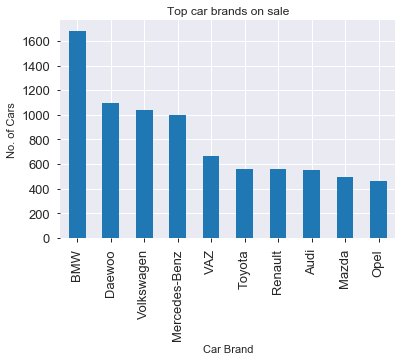

In [193]:
newcarsales4.car.value_counts().head(10).plot.bar()
plt.title("Top car brands on sale")
plt.ylabel('No. of Cars')
plt.xlabel('Car Brand')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [127]:
newcarsales4["final_price"]=newcarsales4["final_price"].astype("int64")

In [128]:
newcarsales4.nlargest(20,["final_price"],"first")

,car,body,registration,year,model,final_price,final_engV,final_mileage,final_drive,final_engType
12992,Bentley,sedan,yes,2016,Mulsanne,547800,6.75,142,rear,Petrol
11100,Bentley,crossover,yes,2016,Bentayga,499999,6,1,full,Petrol
11101,Bentley,crossover,yes,2016,Bentayga,474999,6,1,full,Petrol
11102,Bentley,crossover,yes,2016,Bentayga,449999,6,1,full,Petrol
6682,Mercedes-Benz,other,yes,2012,G 500,300000,5,37,full,Petrol
11316,Mercedes-Benz,sedan,yes,2011,S 600,300000,6,68,rear,Petrol
11315,Mercedes-Benz,sedan,yes,2011,S 600,295000,6,29,rear,Petrol
11646,Mercedes-Benz,sedan,yes,2011,S-Guard,295000,6,29,rear,Petrol
11647,Mercedes-Benz,sedan,yes,2011,S-Guard,295000,6,29,rear,Petrol
626,Land Rover,crossover,yes,2016,Range Rover,285000,5,4.5,full,Petrol


In [129]:
newcarsales4.nlargest(20,["final_price"],"first").drop_duplicates("model")

,car,body,registration,year,model,final_price,final_engV,final_mileage,final_drive,final_engType
12992,Bentley,sedan,yes,2016,Mulsanne,547800,6.75,142,rear,Petrol
11100,Bentley,crossover,yes,2016,Bentayga,499999,6,1,full,Petrol
6682,Mercedes-Benz,other,yes,2012,G 500,300000,5,37,full,Petrol
11316,Mercedes-Benz,sedan,yes,2011,S 600,300000,6,68,rear,Petrol
11646,Mercedes-Benz,sedan,yes,2011,S-Guard,295000,6,29,rear,Petrol
626,Land Rover,crossover,yes,2016,Range Rover,285000,5,4.5,full,Petrol
10940,Bentley,sedan,yes,2014,Flying Spur,259000,6,142,full,Petrol
8374,Mercedes-Benz,other,yes,2016,S 63 AMG,250000,5.5,6,full,Petrol
8250,Bentley,other,yes,2015,Continental,222222,6,142,full,Petrol
8331,Mercedes-Benz,crossover,yes,2013,G 63 AMG,219900,6.3,30,full,Petrol


In [130]:
newcarsales4[newcarsales4["year"]==2015].nlargest(20,["final_price"],"first").drop_duplicates("model")

,car,body,registration,year,model,final_price,final_engV,final_mileage,final_drive,final_engType
8250,Bentley,other,yes,2015,Continental,222222,6,142,full,Petrol
6924,Mercedes-Benz,other,yes,2015,S 500,169000,4.7,1,full,Petrol
866,Land Rover,crossover,yes,2015,Range Rover,168000,4.4,6,full,Diesel
2121,Toyota,crossover,yes,2015,Land Cruiser 200,164500,4.5,50,full,Diesel
3276,Land Rover,crossover,yes,2015,Range Rover Sport,147000,5,15,full,Petrol
6596,BMW,crossover,yes,2015,X5 M,133000,4.4,7,full,Petrol
4858,Mercedes-Benz,sedan,yes,2015,S 350,126000,3,14,full,Diesel


In [131]:
newcarsales4.nsmallest(20,["final_price","year"],"first").drop_duplicates("model")

,car,body,registration,year,model,final_price,final_engV,final_mileage,final_drive,final_engType
12814,Moskvich-AZLK,sedan,yes,1976,2140,280,1.5,99,rear,Petrol
12935,ZAZ,sedan,yes,1989,968,370,1.1,3,rear,Petrol
10199,VAZ,sedan,yes,1982,2101,400,1.1,10,rear,Petrol
10537,ZAZ,hatch,yes,1994,1102 ??????,407,0.9,143,front,Petrol
10576,Opel,sedan,no,1996,Vectra B,499,1.6,230,front,Petrol
6671,Opel,sedan,yes,1990,Omega,500,2,350,rear,Petrol
10100,VAZ,sedan,yes,1994,2105,537,1.5,87,rear,Petrol
12998,Moskvich-AZLK,sedan,yes,1971,412,550,99.99,30,rear,Petrol
12335,Moskvich-AZLK,sedan,yes,1994,2141,550,1.5,130,front,Petrol


Text(0.5, 1.0, 'Most preferred body type used in 1953-2016')

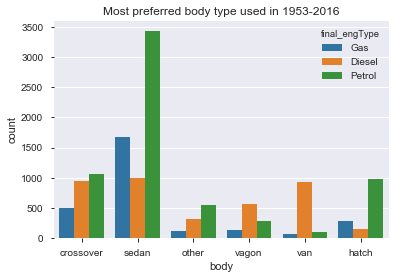

In [132]:
sns.countplot(x='body', data=newcarsales4, hue='final_engType')
plt.title("Most preferred body type used in 1953-2016")